In [3]:
from tensorflow import keras 
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.applications import VGG16

In [4]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3))

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full = X_train_full.reshape((60000, 28,28,1))
X_train_full = X_train_full.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28,1))
X_test = X_test.astype('float32') / 255

In [9]:
X_train_full = tf.image.resize(X_train_full, [32,32])

In [10]:
X_test = tf.image.resize(X_test, [32,32])

In [11]:
X_train_full = np.concatenate((X_train_full, X_train_full, X_train_full), axis=3)
X_test = np.concatenate((X_test,X_test,X_test), axis=3)

In [12]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [16]:
 X_train = conv_base.predict(X_train)

In [17]:
 X_valid = conv_base.predict(X_valid)

In [18]:
 X_test = conv_base.predict(X_test)

In [24]:
train_features = np.reshape(X_train, (len(X_train), 512))
validation_features = np.reshape(X_valid, (len(X_valid), 512))
test_features = np.reshape(X_test, (len(X_test), 512))

In [26]:
train_features.shape

(55000, 512)

In [19]:
from keras import models
from keras import layers 
from keras import optimizers

In [20]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='sigmoid'))

In [28]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [29]:
history = model.fit(train_features, y_train,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, y_valid))

Epoch 1/30
2750/2750 [==============================] - 5s 2ms/step - loss: 1.7039 - acc: 0.4302 - val_loss: 1.0811 - val_acc: 0.7250
Epoch 2/30
2750/2750 [==============================] - 5s 2ms/step - loss: 1.0800 - acc: 0.6370 - val_loss: 0.7756 - val_acc: 0.7618
Epoch 3/30
2750/2750 [==============================] - 5s 2ms/step - loss: 0.8874 - acc: 0.6927 - val_loss: 0.6752 - val_acc: 0.7802
Epoch 4/30
2750/2750 [==============================] - 5s 2ms/step - loss: 0.7882 - acc: 0.7262 - val_loss: 0.6201 - val_acc: 0.7936
Epoch 5/30
2750/2750 [==============================] - 5s 2ms/step - loss: 0.7303 - acc: 0.7442 - val_loss: 0.5872 - val_acc: 0.8026
Epoch 6/30
2750/2750 [==============================] - 5s 2ms/step - loss: 0.6866 - acc: 0.7583 - val_loss: 0.5619 - val_acc: 0.8084
Epoch 7/30
2750/2750 [==============================] - 5s 2ms/step - loss: 0.6552 - acc: 0.7699 - val_loss: 0.5421 - val_acc: 0.8136
Epoch 8/30
2750/2750 [==============================] - 5s 2ms

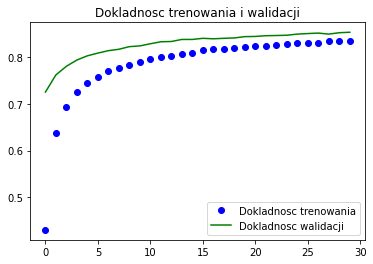

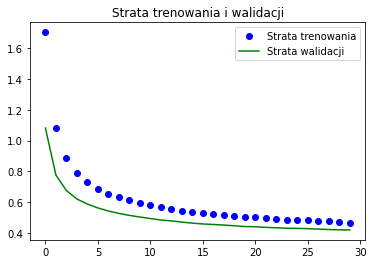

In [32]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'g', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Strata trenowania')
plt.plot(epochs, val_loss, 'g', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

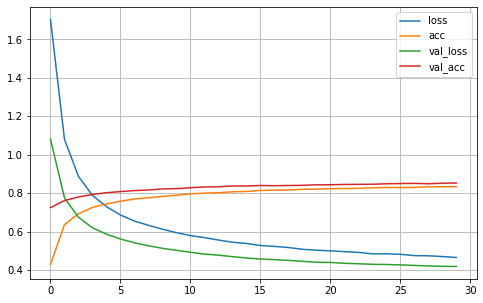

In [45]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.savefig('features.png')

In [37]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
import seaborn as sns

In [40]:
predictions = model.predict(test_features)
predictions = tf.argmax(predictions, axis=-1)
cm = tf.math.confusion_matrix(y_test, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

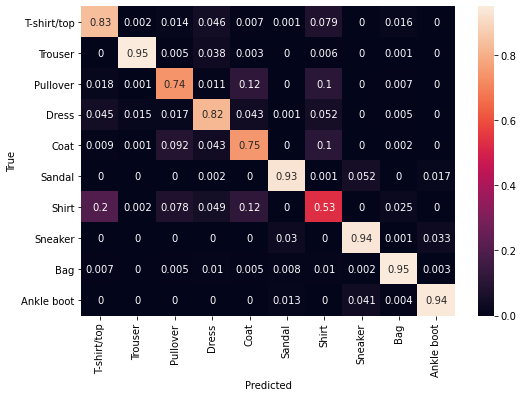

In [44]:
sns.heatmap(
    cm, annot = True,
    xticklabels=labels,
    yticklabels=labels)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('True')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("myplot_features.png", dpi = 100)

In [43]:
test_loss, test_acc = model.evaluate(test_features, y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4465 - acc: 0.8383
test_acc:  0.8382999897003174
